In [24]:
import numpy as np 
import matplotlib.pyplot as plt 

In [25]:
def gaussian_1D(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

#x_values = np.linspace(-3, 3, 120)
x_values = np.random.uniform(-1,1,6)
y_values = np.random.uniform(-1,1,6)
gaussian_1 = gaussian_1D(x_values, mu = 0, sig =1 ) 
gaussian_2 = gaussian_1D(y_values, mu = 0, sig =1 ) 
all_density = np.multiply(gaussian_1, gaussian_2) 
#print (all_density)
xyz = np.hstack((x_values.reshape(-1,1), y_values.reshape(-1,1), all_density.reshape(-1,1)))
print (xyz.shape)
print (xyz[:3])


(6, 3)
[[0.20189241 0.10435497 0.97450537]
 [0.69488858 0.87501566 0.53565699]
 [0.21888619 0.94450089 0.62500442]]


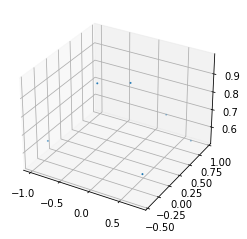

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.plot3D(x_values, x_values, all_density, 'gray')
ax.scatter3D(x_values, y_values, all_density, 'gray', s= 1)

In [27]:
from pyhull.delaunay import DelaunayTri
from pyhull.convex_hull import ConvexHull


In [28]:
hull = ConvexHull(xyz)

In [29]:
hull.vertices[:5]
#print (np.max(hull.vertices))

[[3, 1, 4], [5, 3, 4], [1, 2, 4], [2, 5, 4], [0, 1, 3]]

In [30]:
hull.points[:5]

array([[ 0.20189241,  0.10435497,  0.97450537],
       [ 0.69488858,  0.87501566,  0.53565699],
       [ 0.21888619,  0.94450089,  0.62500442],
       [ 0.79423641, -0.43936107,  0.66237408],
       [-0.99279569, -0.17724225,  0.60137953]])

In [31]:
tri = DelaunayTri(xyz)


ValueError: not enough values to unpack (expected at least 2, got 1)

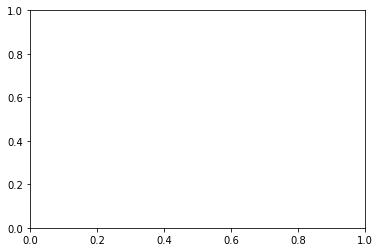

In [36]:
plt.triplot(tri)

In [32]:
tri.points

array([[ 0.20189241,  0.10435497,  0.97450537],
       [ 0.69488858,  0.87501566,  0.53565699],
       [ 0.21888619,  0.94450089,  0.62500442],
       [ 0.79423641, -0.43936107,  0.66237408],
       [-0.99279569, -0.17724225,  0.60137953],
       [-0.18942234, -0.09716118,  0.97759426]])

In [33]:
tri.vertices

[[2, 1, 3, 4], [5, 2, 3, 4], [0, 2, 1, 3], [2, 0, 5, 3]]

In [34]:
from mpl_toolkits import mplot3d


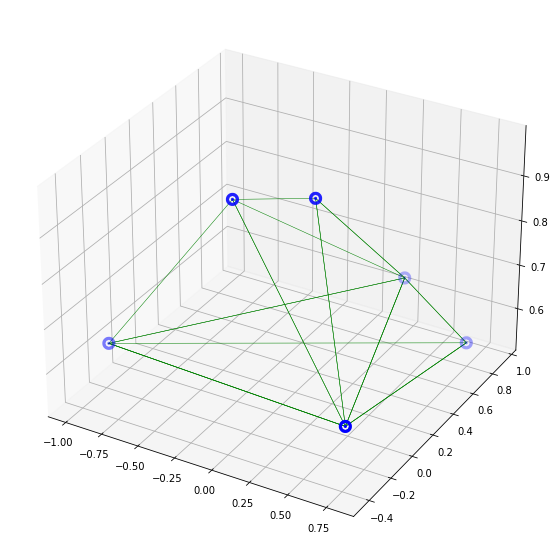

In [35]:
def plot_tri_simple(ax, points, vertices):
    for _vertices in vertices:
        pts = points[_vertices, :] 
        ax.plot3D(pts[[0,1],0], pts[[0,1],1], pts[[0,1],2], color='g', lw='0.5')
        ax.plot3D(pts[[1,2],0], pts[[1,2],1], pts[[1,2],2], color='g', lw='0.5')
        ax.plot3D(pts[[2,3],0], pts[[2,3],1], pts[[2,3],2], color='g', lw='0.5')
        ax.plot3D(pts[[3,0],0], pts[[3,0],1], pts[[3,0],2], color='g', lw='0.5')
        ax.plot3D(pts[[1,3],0], pts[[1,3],1], pts[[1,3],2], color='g', lw='0.5')
        ax.plot3D(pts[[2,3],0], pts[[2,3],1], pts[[2,3],2], color='g', lw='0.5')
    ax.scatter(points[:,0], points[:,1], points[:,2], s = 10,color='b',linewidth=10 )

points = tri.points
vertices = tri.vertices

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

plot_tri_simple(ax, points, vertices)